In [1]:
# from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# **PREPROCESSING**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/thesis/application_record.csv')

In [ ]:
df_auto = pd.read_csv('/content/gdrive/MyDrive/thesis/application_record.csv')

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df.shape

(438557, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df['ID'].duplicated().sum()

47

In [ ]:
# Drop duplicates
#df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df = df.drop_duplicates(subset='ID',keep='first')

In [ ]:
df_auto = df_auto.drop_duplicates(subset='ID',keep='first')

In [ ]:
df.shape

(438510, 18)

In [ ]:
df.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
# non numeric columns - CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE

In [ ]:
df['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 1, 'F': 0})

In [ ]:
df['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

In [ ]:
df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [ ]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df['NAME_EDUCATION_TYPE'].unique()  # ordinal encoding?

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

1. Academic degree
2. Higher education
3. Incomplete higher
4. Secondary / secondary special
5. Lower secondary

In [ ]:
df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df['FLAG_MOBIL'].unique()

array([1])

In [ ]:
df['FLAG_MOBIL'].value_counts()  # only cantains one value: 1 --> drop it later

1    438510
Name: FLAG_MOBIL, dtype: int64

In [ ]:
df['FLAG_WORK_PHONE'].unique()

array([1, 0])

In [ ]:
df['FLAG_PHONE'].unique()

array([0, 1])

In [ ]:
df['FLAG_EMAIL'].unique()

array([0, 1])

In [ ]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [ ]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CODE_GENDER,438510.0,3.286219e-01,0.469713,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_OWN_CAR,438510.0,3.719026e-01,0.483313,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_OWN_REALTY,438510.0,6.933479e-01,0.461104,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
DAYS_BIRTH,438510.0,-1.599802e+04,4185.016222,-25201.0,-24013.00,-23642.00,-23413.00,-23181.00,-22972.00,-21982.0,-19484.00,-15630.00,-12514.00,-10519.0,-9889.00,-9655.00,-9343.0,-9011.00,-8575.00,-7489.0
DAYS_EMPLOYED,438510.0,6.056619e+04,138770.072835,-17531.0,-10913.00,-9533.00,-8486.00,-7792.00,-7205.00,-5295.0,-3103.00,-1467.00,-371.00,365243.0,365243.00,365243.00,365243.0,365243.00,365243.00,365243.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0


In [ ]:
print(df[df['DAYS_EMPLOYED']<=df['DAYS_BIRTH']]) # no abnormal instances

Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS]
Index: []


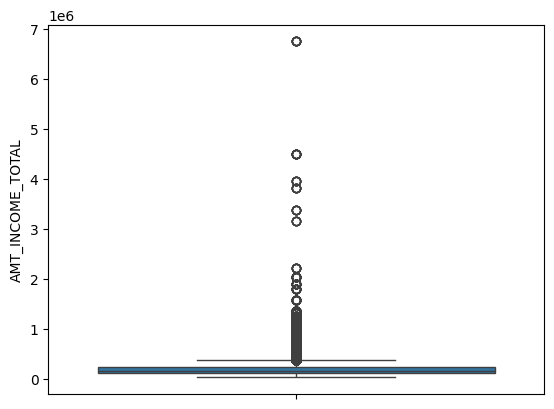

In [ ]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

plt.show()

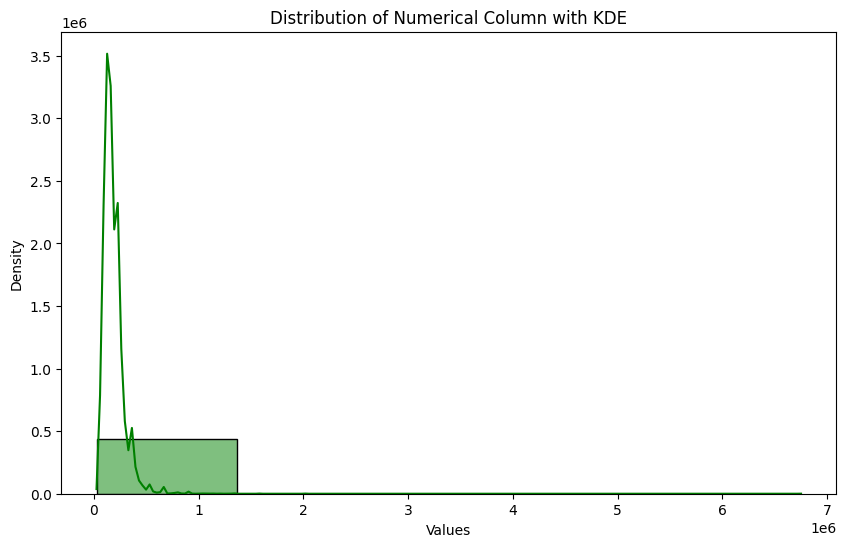

In [ ]:
# Plotting histogram with a density plot
plt.figure(figsize=(10, 6))
sns.histplot(df['AMT_INCOME_TOTAL'], bins=5, kde=True, color='green')  # bins and color are adjustable
plt.title('Distribution of Numerical Column with KDE')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

<Axes: ylabel='CNT_CHILDREN'>

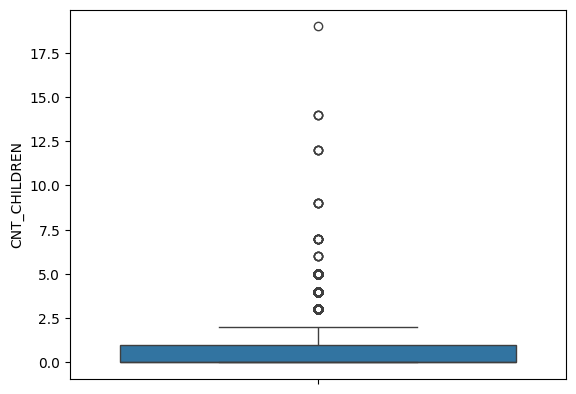

In [ ]:
sns.boxplot(data=df, y=df['CNT_CHILDREN'])

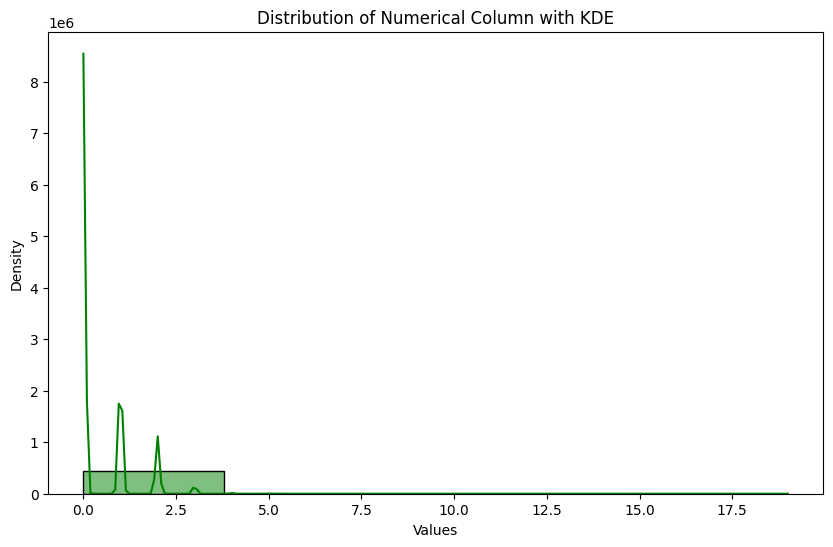

In [ ]:
# Plotting histogram with a density plot
plt.figure(figsize=(10, 6))
sns.histplot(df['CNT_CHILDREN'], bins=5, kde=True, color='green')  # bins and color are adjustable
plt.title('Distribution of Numerical Column with KDE')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [ ]:
df['DAYS_EMPLOYED'].max()  # positive value --> abnormal

365243

<Axes: ylabel='DAYS_BIRTH'>

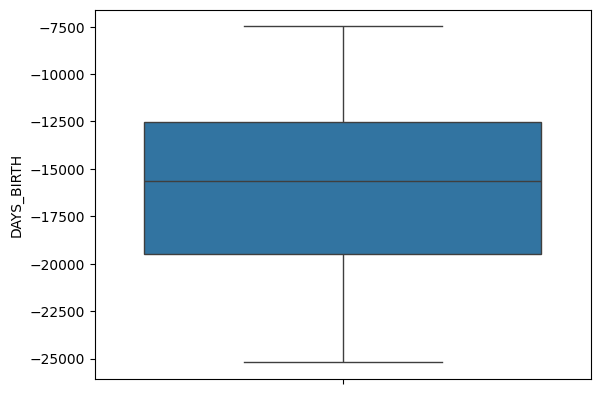

In [ ]:
sns.boxplot(data=df, y=df['DAYS_BIRTH'])

<Axes: ylabel='DAYS_EMPLOYED'>

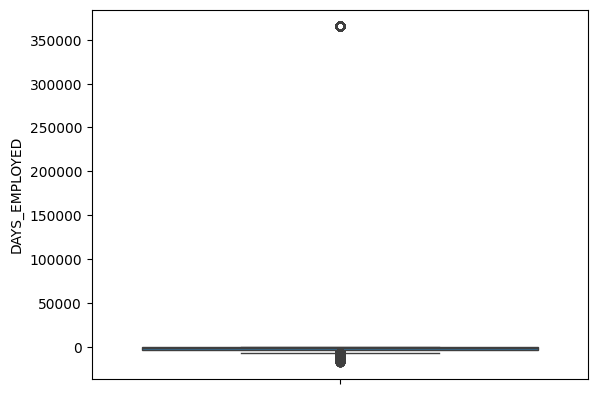

In [ ]:
sns.boxplot(data=df, y=df['DAYS_EMPLOYED'])

In [ ]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()  # all positive values are 365243

DAYS_EMPLOYED
365243    75329
Name: count, dtype: int64

In [ ]:
# replace positive values with 0 --> is that correct?
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)


In [ ]:
df_auto['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [ ]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
0    75329
Name: count, dtype: int64

<Axes: ylabel='DAYS_EMPLOYED'>

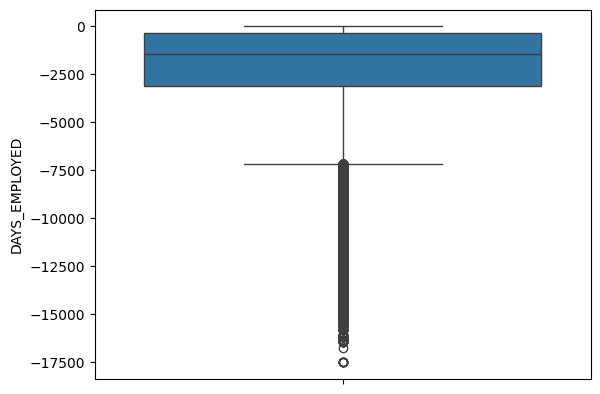

In [ ]:
sns.boxplot(data=df, y=df['DAYS_EMPLOYED'])  # now no outliers

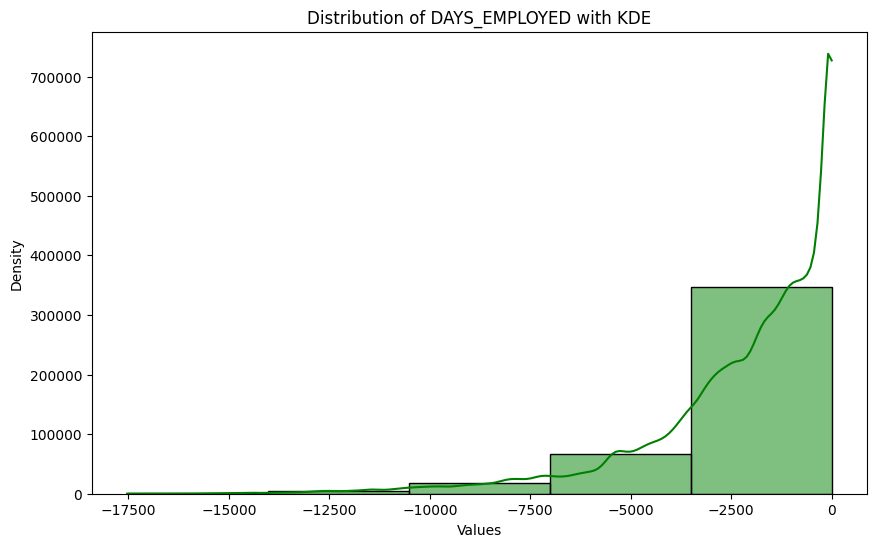

In [ ]:
# Plotting histogram with a density plot
plt.figure(figsize=(10, 6))
sns.histplot(df['DAYS_EMPLOYED'], bins=5, kde=True, color='green')  # bins and color are adjustable
plt.title('Distribution of DAYS_EMPLOYED with KDE')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [ ]:
# convert days of age to years
df['AGE_YEARS']=round(-df['DAYS_BIRTH']/365.2425,0)

In [ ]:
# Create years employed feature
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365.2425)

In [ ]:
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [ ]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CODE_GENDER,438510.0,3.286219e-01,0.469713,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_OWN_CAR,438510.0,3.719026e-01,0.483313,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_OWN_REALTY,438510.0,6.933479e-01,0.461104,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0


In [ ]:
df['ID'].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

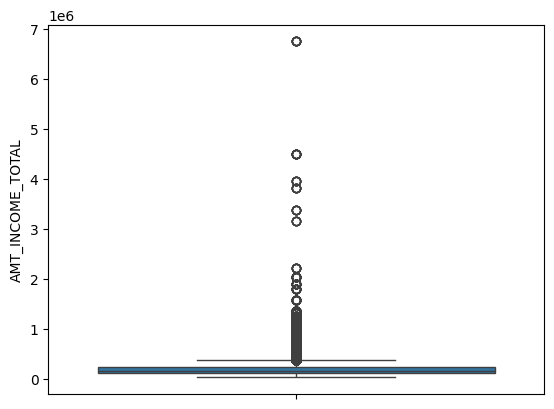

In [ ]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

In [ ]:
# df[df['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


In [ ]:
df.drop(columns=["FLAG_MOBIL"],inplace=True)
# since it only conatins one value: 1

In [ ]:
# scale numeric features
# columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [ ]:
# StandardScaler or MinMaxScaler ?
# st=StandardScaler()
# df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

In [ ]:
# one-hot encode the categorical features except education_type
columns_to_encode = ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [ ]:
# ordinal encode education type
education_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
encoder = OrdinalEncoder(categories=[education_order])
encoded_education_type = encoder.fit_transform(df[['NAME_EDUCATION_TYPE']])
df['NAME_EDUCATION_TYPE'] = encoded_education_type

In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,1,1,1,0,427500.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5008805,1,1,1,0,427500.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5008806,1,1,1,0,112500.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5008808,0,0,1,0,270000.0,1.0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,1.0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438553,6840222,0,0,0,0,103500.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438554,6841878,0,0,0,0,54000.0,3.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
438555,6842765,0,0,1,0,72000.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df1 = pd.read_csv('/content/gdrive/MyDrive/thesis/credit_record.csv')

In [23]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
df1.shape

(1048575, 3)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [ ]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [ ]:
df1['ID'].nunique()

45985

In [10]:
# consider past due 30 days + as default
df1['target']=df1['STATUS']

df1.loc[df1['target'].isin(['1', '2', '3', '4', '5']),'target']=1
df1['target'].replace('0', 0, inplace=True)
df1['target'].replace('X', 0, inplace=True)
df1['target'].replace('C', 0, inplace=True)

# df1.loc[df1['target']>=1,'target']=1
df1['target']=df1['target'].astype(int)

In [11]:
df1.sample(10)

,ID,MONTHS_BALANCE,STATUS,target
176709,5016478,-1,0,0
1023066,5148789,-10,C,0
27627,5002966,-3,X,0
173868,5016365,-15,X,0
427027,5051228,-4,C,0
661322,5090701,-2,0,0
19665,5002607,-34,X,0
295600,5028351,-20,X,0
633769,5089049,-21,0,0
864485,5120301,-1,0,0


In [12]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()

In [13]:
df2.sample(10)

,ID,target
39459,5125125,0
20556,5060048,0
45063,5149121,0
32653,5105398,0
24370,5068048,0
10246,5023896,1
29123,5091281,1
28405,5090311,0
11220,5025127,1
25259,5069184,0


In [29]:
df2["target"].value_counts()
# default rate = 0.116

target
0    40635
1     5350
Name: count, dtype: int64

In [30]:
new_df=pd.merge(df, df2, how='inner', on=['ID'])

In [14]:
new_df_auto = pd.merge(df_auto, df2, how='inner', on=['ID'])

In [31]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target
0,5008804,1,1,1,0,427500.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,5008805,1,1,1,0,427500.0,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,5008806,1,1,1,0,112500.0,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5008808,0,0,1,0,270000.0,1.0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,5008809,0,0,1,0,270000.0,1.0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
36453,5149834,0,0,1,0,157500.0,3.0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
36454,5149838,0,0,1,0,157500.0,3.0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
36455,5150049,0,0,1,0,283500.0,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
new_df_auto

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


In [16]:
# Extract how many months account has been open for
start_df=pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [17]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [34]:
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [18]:
new_df_auto=pd.merge(new_df_auto, start_df, how='inner', on=['ID'])

In [ ]:
new_df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE_YEARS', 'YEARS_EMPLOYED', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'FLAG_WORK_PHONE_0', 'FLAG_WORK_PHONE_1', 'FLAG_PHONE_0',
       'FLAG_PHONE_1', 'FLAG_EMAIL_0', 'FLAG_EMAIL_1

In [35]:
new_df.shape

(36457, 50)

In [19]:
new_df_auto.shape

(36457, 20)

In [37]:
new_df['target'].value_counts()

target
0    32166
1     4291
Name: count, dtype: int64

In [20]:
new_df_auto['target'].value_counts()

target
0    32166
1     4291
Name: count, dtype: int64

In [38]:
new_df.to_csv('/content/gdrive/MyDrive/thesis/merged_data1.csv', index=False)

In [21]:
new_df_auto.to_csv('/content/gdrive/MyDrive/thesis/auto_data.csv', index=False)

In [ ]:
subset = new_df.sample(frac=0.1, replace=False)